### Librerias

In [2]:
from ortools.sat.python import cp_model
import random
import matplotlib.pyplot as plt
import geopandas as gpd
plt.rcParams['figure.figsize'] = (10,20)

### Variables

In [4]:
hospitals_names = [
    "Hospital Nacional Hipólito Unanue",
    "Hospital Cayetano Heredia",
    "Hospital Santa Rosa",
    "Clínica San Felipe S.A.",
    "Hospital Nacional Guillermo Almenara Irigoyen",
    "Hospital Nacional Edgardo Rebagliati Martins",
    "Medic Ser S.A.C. - Auna Clínica Delgado",
    "Clínica Ricardo Palma",
    "Clínica San Pablo - Sede Surco",
    "Hospital Nacional Dos de Mayo",
    "Hospital Nacional Sergio E. Bernales",
    "Clínica Anglo Americana",
    "Hospital Nacional Alberto Sabogal Sologuren de la Red Asistencial Sabogal",
    "Centro Médico Naval 'Cirujano Mayor Santiago Tavara'"
]

hospitals_location = [
    (-12.04104755, -76.9926558486822),
    (-12.0219092, -77.0552920536621),
    (-12.07207945, -77.0610369112724),
    (-12.0824746, -76.9689804),
    (-12.0595699, -77.0223685874435),
    (-12.0782058, -77.0399864964742),
    (-12.1156956, -77.0334694),
    (-11.96637165, -77.0564145231308),
    (-12.10016755, -76.9716073619477),
    (-12.055924, -77.0156908277204),
    (-11.9141137, -77.0375128972812),
    (-12.1089771, -77.0392534748835),
    (-12.0642547, -77.1222972506228),
    (-12.05872935, -77.0891193909484)
]

#camas_list = [50, 40, 30, 20, 100, 80, 25, 35, 45, 55, 30, 40, 70, 15]
camas_list = [5, 4, 3, 2, 10, 8, 2, 3, 4, 5, 3, 4, 7, 1]
severity={
    1:'Asymptomatic',
    2:'Mild symptoms',
    3:'Strong symptoms',
    4:'Requires hospitalization',
    5:'Requires UIC (mechanical ventilator)'
}

districts = {
    'San Juan de Lurigancho': {
        'number_cases': 14466,
        'latitud_max': -11.947,
        'latitud_min': -12.016,
        'longitud_max': -76.952,
        'longitud_min': -77.054
    },
    'San Martin de Porres': {
        'number_cases': 10851,
        'latitud_max': -11.993,
        'latitud_min': -12.039,
        'longitud_max': -77.042,
        'longitud_min': -77.070
    },
    'Comas': {
        'number_cases': 8687,
        'latitud_max': -11.962,
        'latitud_min': -12.057,
        'longitud_max': -76.967,
        'longitud_min': -77.044
    },
    'Ate': {
        'number_cases': 7900,
        'latitud_max': -12.013,
        'latitud_min': -12.055,
        'longitud_max': -76.862,
        'longitud_min': -76.976
    },
    'Villa el Salvador': {
        'number_cases': 6732,
        'latitud_max': -12.196,
        'latitud_min': -12.247,
        'longitud_max': -76.901,
        'longitud_min': -77.027
    },
    'El Agustino': {
        'number_cases': 6471,
        'latitud_max': -11.970,
        'latitud_min': -12.039,
        'longitud_max': -76.937,
        'longitud_min': -77.004
    },
    'La Victoria': {
        'number_cases': 6383,
        'latitud_max': -12.067,
        'latitud_min': -12.075,
        'longitud_max': -76.994,
        'longitud_min': -77.013
    },
    'Jesús María': {
        'number_cases': 5859,
        'latitud_max': -12.077,
        'latitud_min': -12.084,
        'longitud_max': -76.971,
        'longitud_min': -77.048
    },
    'San Juan de Miraflores': {
        'number_cases': 5672,
        'latitud_max': -12.115,
        'latitud_min': -12.143,
        'longitud_max': -76.933,
        'longitud_min': -76.983
    },
    'Los Olivos': {
        'number_cases': 4885,
        'latitud_max': -11.959,
        'latitud_min': -11.989,
        'longitud_max': -76.995,
        'longitud_min': -77.073
    },
    'Villa María del Triunfo': {
        'number_cases': 4795,
        'latitud_max': -12.179,
        'latitud_min': -12.232,
        'longitud_max': -76.934,
        'longitud_min': -76.994
    },
    'Cercado de Lima': {
        'number_cases': 4563,
        'latitud_max': -12.031,
        'latitud_min': -12.064,
        'longitud_max': -77.001,
        'longitud_min': -77.054
    },
    'Rimac': {
        'number_cases': 4548,
        'latitud_max': -12.027,
        'latitud_min': -12.075,
        'longitud_max': -76.969,
        'longitud_min': -77.041
    },
    'Santa Anita': {
        'number_cases': 4425,
        'latitud_max': -12.040,
        'latitud_min': -12.078,
        'longitud_max': -76.960,
        'longitud_min': -77.007
    },
    'Santiago de Surco': {
        'number_cases': 4223,
        'latitud_max': -12.092,
        'latitud_min': -12.150,
        'longitud_max': -76.944,
        'longitud_min': -77.010
    },
    'Puente Piedra': {
        'number_cases': 4002,
        'latitud_max': -11.940,
        'latitud_min': -11.958,
        'longitud_max': -76.871,
        'longitud_min': -76.935
    },
    'Independencia': {
        'number_cases': 3846,
        'latitud_max': -11.982,
        'latitud_min': -12.029,
        'longitud_max': -77.028,
        'longitud_min': -77.064
    },
    'Carabayllo': {
        'number_cases': 3329,
        'latitud_max': -11.853,
        'latitud_min': -11.988,
        'longitud_max': -76.919,
        'longitud_min': -77.061
    },
    'San Miguel': {
        'number_cases': 2629,
        'latitud_max': -12.062,
        'latitud_min': -12.088,
        'longitud_max': -76.968,
        'longitud_min': -77.086
    },
    'San Borja': {
        'number_cases': 1992,
        'latitud_max': -12.073,
        'latitud_min': -12.105,
        'longitud_max': -76.983,
        'longitud_min': -77.037
    },
    'Breña': {
        'number_cases': 1955,
        'latitud_max': -12.046,
        'latitud_min': -12.080,
        'longitud_max': -76.999,
        'longitud_min': -77.054
    },
    'Miraflores': {
        'number_cases': 1768,
        'latitud_max': -12.102,
        'latitud_min': -12.137,
        'longitud_max': -77.002,
        'longitud_min': -77.034
    },
    'Surquillo': {
        'number_cases': 1652,
        'latitud_max': -12.095,
        'latitud_min': -12.114,
        'longitud_max': -76.986,
        'longitud_min': -77.014
    },
    'Lurigancho': {
        'number_cases': 1564,
        'latitud_max': -11.9156,
        'latitud_min': -12.0822,
        'longitud_max': -76.7921,
        'longitud_min': -76.9864
    },
    'La Molina': {
        'number_cases': 1432,
        'latitud_max': -12.052,
        'latitud_min': -12.087,
        'longitud_max': -76.907,
        'longitud_min': -76.985
    },
    'San Luis': {
        'number_cases': 1326,
        'latitud_max': -12.081,
        'latitud_min': -12.093,
        'longitud_max': -76.975,
        'longitud_min': -76.993
    },
    'San Isidro': {
        'number_cases': 1313,
        'latitud_max': -12.084,
        'latitud_min': -12.096,
        'longitud_max': -76.982,
        'longitud_min': -77.014
    },
    'Pueblo Libre': {
        'number_cases': 1307,
        'latitud_max': -12.064,
        'latitud_min': -12.092,
        'longitud_max': -76.973,
        'longitud_min': -77.028
    },
    'Lurin': {
        'number_cases': 1260,
        'latitud_max': -11.884,
        'latitud_min': -12.087,
        'longitud_max': -76.784,
        'longitud_min': -76.961
    },
    'Lince': {
        'number_cases': 1229,
        'latitud_max': -12.083,
        'latitud_min': -12.099,
        'longitud_max': -76.973,
        'longitud_min': -77.000
    },
    'Magdalena del Mar': {
        'number_cases': 1060,
        'latitud_max': -12.089,
        'latitud_min': -12.107,
        'longitud_max': -77.058,
        'longitud_min': -77.074
    },
    'Chaclacayo': {
        'number_cases': 679,
        'latitud_max': -11.949,
        'latitud_min': -11.991,
        'longitud_max': -76.780,
        'longitud_min': -76.864
    },
    'Pachacamac': {
        'number_cases': 657,
        'latitud_max': -12.149,
        'latitud_min': -12.259,
        'longitud_max': -76.859,
        'longitud_min': -77.024
    },
    'Barranco': {
        'number_cases': 654,
        'latitud_max': -12.127,
        'latitud_min': -12.160,
        'longitud_max': -77.009,
        'longitud_min': -77.040
    },
    'Ancón': {
        'number_cases': 577,
        'latitud_max': -11.747,
        'latitud_min': -11.801,
        'longitud_max': -77.126,
        'longitud_min': -77.170
    },
    'Pucusana': {
        'number_cases': 323,
        'latitud_max': -12.478,
        'latitud_min': -12.492,
        'longitud_max': -76.802,
        'longitud_min': -76.832
    },
    'Chorrillos': {
        'number_cases': 175,
        'latitud_max': -12.149,
        'latitud_min': -12.193,
        'longitud_max': -76.792,
        'longitud_min': -76.832
    },
    'Cieneguilla': {
        'number_cases': 175,
        'latitud_max': -12.009,
        'latitud_min': -12.108,
        'longitud_max': -76.717,
        'longitud_min': -76.853
    },
    'Santa Rosa': {
        'number_cases': 163,
        'latitud_max': -12.564,
        'latitud_min': -12.576,
        'longitud_max': -76.842,
        'longitud_min': -76.860
    },
    'Punta Hermosa': {
        'number_cases': 78,
        'latitud_max': -12.329,
        'latitud_min': -12.359,
        'longitud_max': -76.805,
        'longitud_min': -76.823
    },
    'San Bartolo': {
        'number_cases': 68,
        'latitud_max': -12.389,
        'latitud_min': -12.421,
        'longitud_max': -76.778,
        'longitud_min': -76.795
    },
    'Punta Negra': {
        'number_cases': 51,
        'latitud_max': -12.371,
        'latitud_min': -12.400,
        'longitud_max': -76.793,
        'longitud_min': -76.805
    },
    'Santa María del Mar': {
        'number_cases': 23,
        'latitud_max': -12.409,
        'latitud_min': -12.413,
        'longitud_max': -76.770,
        'longitud_min': -76.774
    }
}

### Funciones

In [6]:
def generar_ubicaciones(dicc_dist):
    ubicaciones = []
    
    for distrito, datos in dicc_dist.items():
        number_cases = datos['number_cases']
        latitud_max = datos['latitud_max']
        latitud_min = datos['latitud_min']
        longitud_max = datos['longitud_max']
        longitud_min = datos['longitud_min']
        
        for _ in range(number_cases):
            latitud = random.uniform(latitud_min, latitud_max)
            longitud = random.uniform(longitud_min, longitud_max)
            severity_value = random.randint(1, len(severity))
            ubicaciones.append({'distrito': distrito, 'latitud': latitud, 'longitud': longitud, 'severity_value': severity_value})
    
    return ubicaciones

def dist(p1,p2):
  d = (((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)**0.5)
  return int(d)

In [7]:
ubicaciones = generar_ubicaciones(districts)
n_cases = 100
random.shuffle(ubicaciones)
ubicaciones = ubicaciones[:n_cases]

ubi_lat=tuple(item['latitud'] for item in ubicaciones)
ubi_lon=tuple(item['longitud'] for item in ubicaciones)
ubi_severity=tuple(item['severity_value'] for item in ubicaciones)
ubi_size = tuple(x**2 for x in ubi_severity)
hos_lat, hos_lon = zip(*hospitals_location)

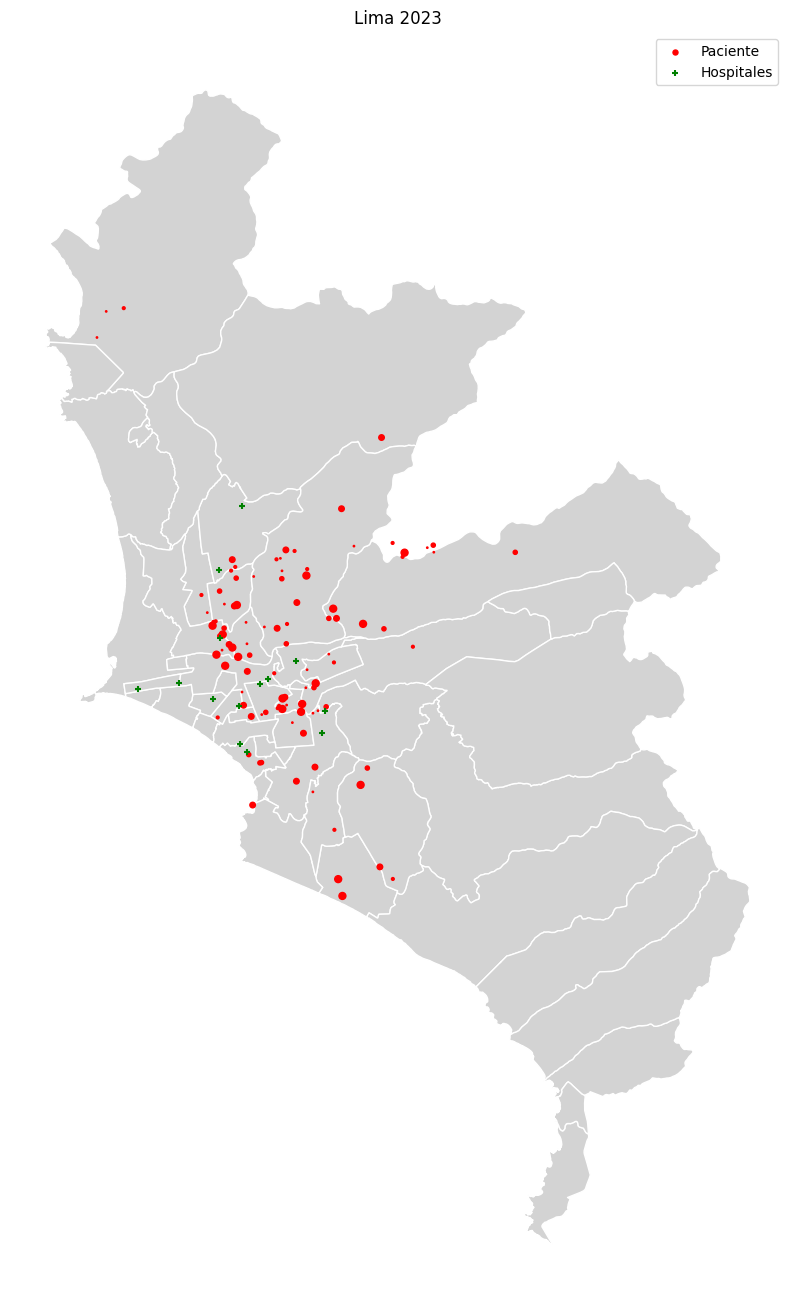

In [8]:
df = gpd.GeoDataFrame(geometry=gpd.points_from_xy(ubi_lon + hos_lon, ubi_lat + hos_lat))
lima = gpd.read_file('lima_callao_distritos.geojson')
base = lima.plot(color='lightgray', edgecolor='white')
df.iloc[:n_cases].plot(ax=base, marker='o', color='red', label='Paciente', markersize = ubi_size[:n_cases])
df.iloc[n_cases:].plot(ax=base, marker='+', color='green', label='Hospitales', markersize=20)

plt.title('Lima 2023')
plt.legend()
plt.axis('off')
plt.show()

# CSO

### Creación de las variables del modelo

In [9]:
model = cp_model.CpModel()
x = {}
for i in range(len(hospitals_location)):
  for j in range(camas_list[i]):
    for k in range(n_cases):
      x[(i,j,k)] = model.NewBoolVar('x_'+str(i)+'_'+str(j)+'_'+str(k))

### Constraints

In [10]:
for i in range(len(hospitals_location)):
  for j in range(camas_list[i]):
    model.Add(sum([x[(i,j,k)] for k in range(n_cases)]) <= 1)

for k in range(n_cases):
  n_pacientes_camas_hospitales = []
  for i in range(len(hospitals_location)):
    n_pacientes_camas_hospitales.append(sum(x[(i,j,k)] for j in range(camas_list[i]))) 
    model.Add(sum(n_pacientes_camas_hospitales) <= 1)

In [11]:
max_dist = 0
ubi_lat_long = [(ubi['latitud'], ubi['longitud']) for ubi in ubicaciones]
for i in range(len(hospitals_location)):
  for k in range(n_cases):
    if max_dist < dist(hospitals_location[i], ubi_lat_long[k]):
      max_dist = dist(hospitals_location[i], ubi_lat_long[k])

In [12]:
pref = []
for i in range(len(hospitals_location)):
  for j in range(camas_list[i]):
    for k in range(n_cases):
      pref += [x[(i,j,k)] - x[(i,j,k)] * dist(ubi_lat_long[k], hospitals_location[i]) + x[(i,j,k)] * ubi_severity[k]]
model.Maximize(sum(pref))

### Solver

In [13]:
solver = cp_model.CpSolver()
status = solver.Solve(model)
if status == cp_model.OPTIMAL or status==cp_model.FEASIBLE:
  print('Tiempo:',solver.WallTime())
  for i in range(len(hospitals_location)):
    print('Hospital {} {} tiene {} camas'.format(i+1,hospitals_names[i],camas_list[i]))
    for j in range(camas_list[i]):
      for k in range(n_cases):
        if solver.Value(x[(i,j,k)]):
          print('\tPaciente {} en la cama {}'.format(k+1,j+1))
    print()

Tiempo: 1.769814725
Hospital 1 Hospital Nacional Hipólito Unanue tiene 5 camas
	Paciente 3 en la cama 1
	Paciente 26 en la cama 2
	Paciente 4 en la cama 3
	Paciente 73 en la cama 4
	Paciente 14 en la cama 5

Hospital 2 Hospital Cayetano Heredia tiene 4 camas
	Paciente 81 en la cama 1
	Paciente 15 en la cama 2
	Paciente 38 en la cama 3
	Paciente 70 en la cama 4

Hospital 3 Hospital Santa Rosa tiene 3 camas
	Paciente 64 en la cama 1
	Paciente 37 en la cama 2
	Paciente 22 en la cama 3

Hospital 4 Clínica San Felipe S.A. tiene 2 camas
	Paciente 98 en la cama 1
	Paciente 44 en la cama 2

Hospital 5 Hospital Nacional Guillermo Almenara Irigoyen tiene 10 camas
	Paciente 49 en la cama 1
	Paciente 16 en la cama 2
	Paciente 96 en la cama 3
	Paciente 71 en la cama 4
	Paciente 36 en la cama 5
	Paciente 11 en la cama 6
	Paciente 75 en la cama 7
	Paciente 74 en la cama 8
	Paciente 43 en la cama 9
	Paciente 83 en la cama 10

Hospital 6 Hospital Nacional Edgardo Rebagliati Martins tiene 8 camas
	Pacie

In [14]:
plot_lineas = [[] for _ in range(len(hospitals_location))]
for i in range(len(hospitals_location)):
  for j in range(camas_list[i]):
    for k in range(n_cases):
      if solver.Value(x[(i,j,k)]):
        linea_abcisa = [hospitals_location[i][0], ubi_lat_long[k][0]]
        linea_ordenada = [hospitals_location[i][1], ubi_lat_long[k][1]]
        plot_lineas[i].append([linea_abcisa,linea_ordenada])

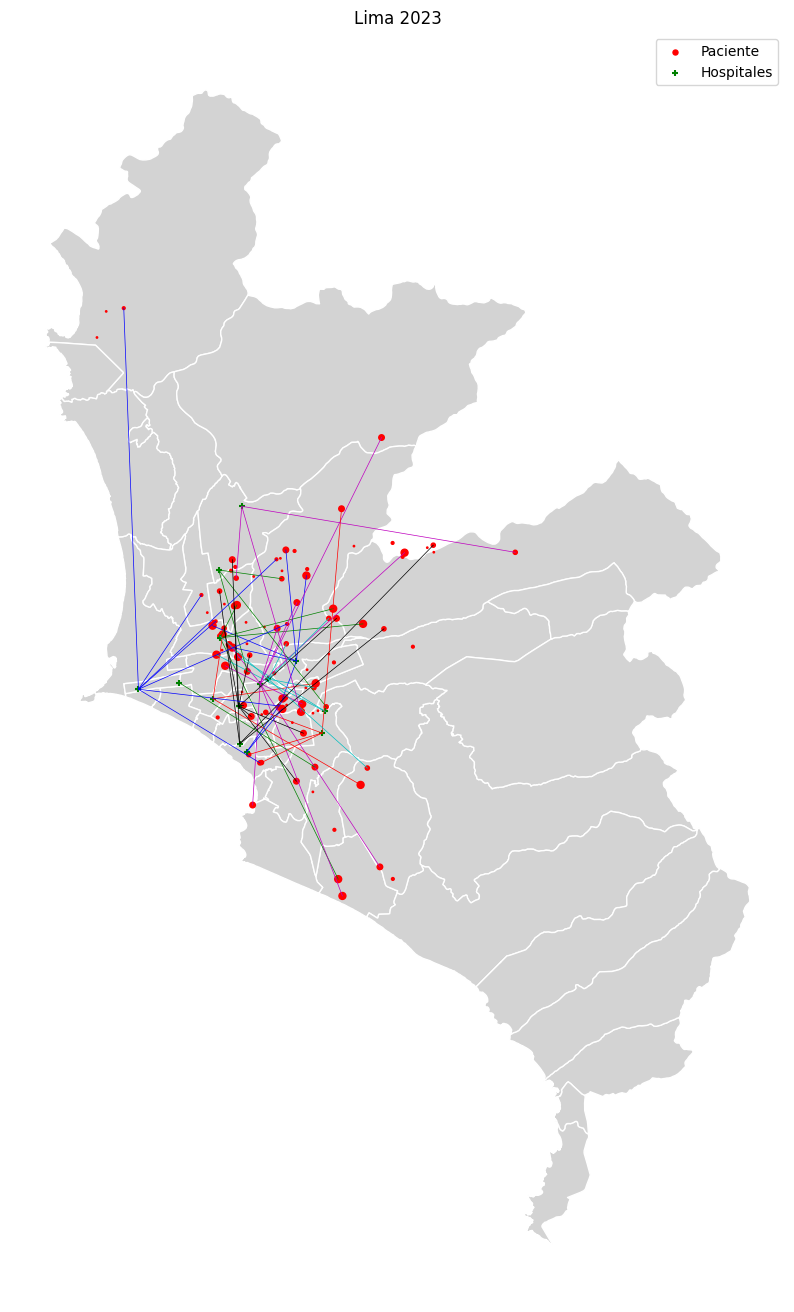

In [15]:
from itertools import cycle
lima = gpd.read_file('lima_callao_distritos.geojson')
base = lima.plot(color='lightgray', edgecolor='white')
df.iloc[:n_cases].plot(ax=base, marker='o', color='red', label='Paciente', markersize = ubi_size[:n_cases])
df.iloc[n_cases:].plot(ax=base, marker='+', color='green', label='Hospitales', markersize=20)
colores = cycle('bgrcmk')
for i in range(len(hospitals_location)):
    c = next(colores)
    for (x_,y_) in plot_lineas[i]:
        plt.plot(y_, x_, c=c, linewidth=.5)
plt.title('Lima 2023')
plt.legend()
plt.axis('off')
plt.show()